# Time Series Analysis of Nintendo Stock Prices: Uncovering Patterns in Market Volatility

Accurate stock price prediction is difficult due to the numerous variables influencing markets such as economic indicators, geopolitical events, and the ever-fluctuating sentiment of investors. Amidst this complexity, gaming industry stocks stand out as particularly volatile due to rapidly changing consumer preferences, intense competition, and sensitivity to game release schedules. Nevertheless, the robust growth of the digital entertainment sector continues to attract investor interest. Hence, this project aims to develop a time series forecasting model for a prominent video game company.

## Scope
This project aims to develop a time series forecasting model for Nintendo. Nintendo's significance in the gaming industry, iconic franchises, and market impact justify its selection for stock price analysis, offering insights into the broader gaming market.

## Performance metrics
Closing price will be modelled in this data science project. This is a practical and widely accepted approach in data science projects related to stock market analysis as it reflects the market sentiment of a stock's value at the end of the trading day.

# Data exploration

## Dependencies

In [1]:
import sys
CONFIG_DIRECTORY = 'C:\\Users\\billy\\OneDrive\\Documents\\Python Scripts\\1. Portfolio\\time-series-stock-prices\\time-series-stock-prices'
if CONFIG_DIRECTORY not in sys.path:
    sys.path.insert(0, CONFIG_DIRECTORY)

import config
import datetime
import numpy as np
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-muted')

## Import data
* The data is imported as a DataFrame where date is the index

In [2]:
stock_prices = pd.read_csv(config.file_directory('raw') + 'Nintendo.csv', parse_dates=['Date'])
stock_prices = stock_prices.set_index('Date')
stock_prices.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,4.200,4.275,4.05,4.200,3.990652,134500
2000-01-04,3.950,4.025,3.80,3.950,3.753113,171000
2000-01-05,3.875,3.900,3.70,3.875,3.681852,301500


## Data types
* All variables are numerical.

In [3]:
stock_prices.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

## Missing values
* No missing values are present.

In [4]:
stock_prices.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Visualising the time series
* Daily stock prices from 2020 are present in the data. The time series graph shown below indicates substantial growth in the price of Nintendo stock over the past two decades.
* From a time series analyses perspective, the series is clearly non-stationary as its variance and mean changes over time.

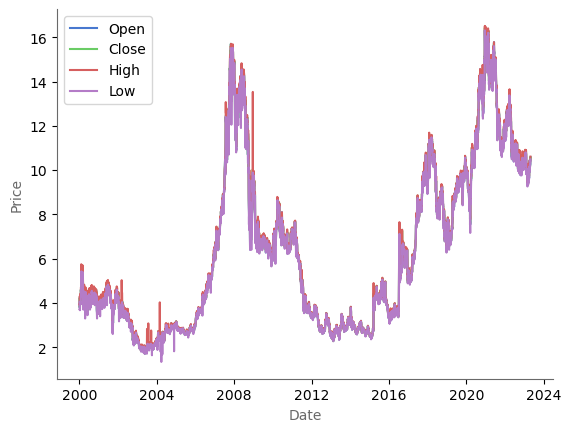

In [5]:
fig, axes = plt.subplots()
for col in ['Open', 'Close', 'High', 'Low']:
    axes.plot(stock_prices[col], label=col);

axes.set_ylabel('Price', color='dimgray');
axes.set_xlabel('Date', color='dimgray');
axes.spines[['top', 'right']].set_visible(False);
axes.spines[['left', 'bottom']].set_color('dimgray');
axes.legend();

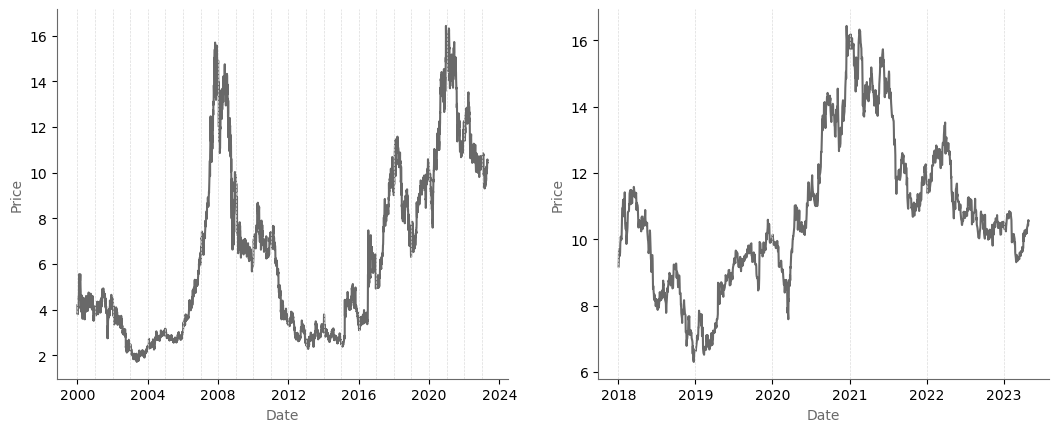

In [6]:
stock_prices_10yr = stock_prices['Close'].copy(deep=True)
stock_prices_10yr = stock_prices_10yr.loc['2018-01-01':]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6.4*2, 4.8))
axes[0].plot(stock_prices['Close'], color='dimgray');
axes[1].plot(stock_prices_10yr, color='dimgray');

for x in [datetime.datetime(y, 1, 1) for y in stock_prices['Close'].index.year.unique()]:
    axes[0].axvline(x, color='gainsboro', linestyle='--', linewidth=0.5)
for x in [datetime.datetime(y, 1, 1) for y in stock_prices_10yr.index.year.unique()]:
    axes[1].axvline(x, color='gainsboro', linestyle='--', linewidth=0.5)
for ax in axes:
    ax.set_ylabel('Price', color='dimgray');
    ax.set_xlabel('Date', color='dimgray');
    ax.spines[['top', 'right']].set_visible(False);
    ax.spines[['left', 'bottom']].set_color('dimgray');

# Data cleansing
* The series must be transformed so it is stationary before training a time series model. Evaluation of a stationary series will also be crucial to model selection.
* Only stock prices from 2020 will be transformed. The large volume of data available is unnecessary for this task and could lead to overfitting (if model complexity is high).

In [7]:
y = stock_prices.loc['2018-01-01':].copy(deep=True)

*Standardisation*

* As large peaks and troughs in the trend
*Removal of volatility*
* standardise subsection

4. Remove seasonality
5. Test for stationarity

## Standardisation
* Z-score standardisation will be conducted. This is reccomended when evaluating structural patterns using an algorithms. It means the amplitude of peaks and troughs are not so important.

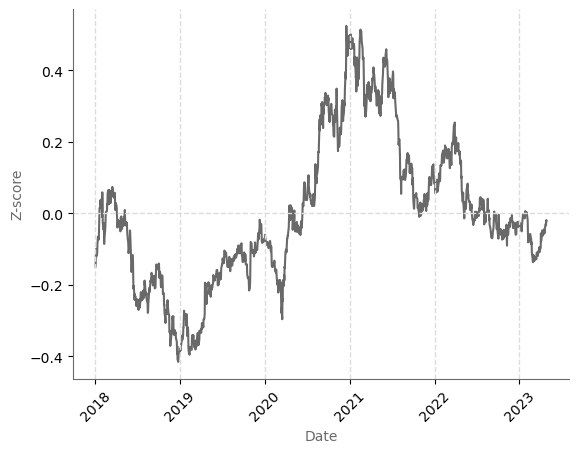

In [8]:
avg, std = y['Close'].mean(), y['Close'].std()
st =  (y['Close'] - avg) / avg

fig, axes = plt.subplots(nrows=1, ncols=1);
axes.plot(st, color='dimgray');
axes.axhline(0, color='gainsboro', linestyle='--', linewidth=1)
for x in [datetime.datetime(y, 1, 1) for y in y.index.year.unique()]:
    axes.axvline(x, color='gainsboro', linestyle='--', linewidth=1)

axes.set_ylabel('Z-score', color='dimgray');
axes.set_xlabel('Date', color='dimgray');
axes.spines[['top', 'right']].set_visible(False);
axes.spines[['left', 'bottom']].set_color('dimgray');
plt.xticks(rotation=45);

## Differencing
* An approximately linear trend is present. First order differencing is sufficient to remove this trend.
* No seasonal effects are obvious meaning no further differencing is required.

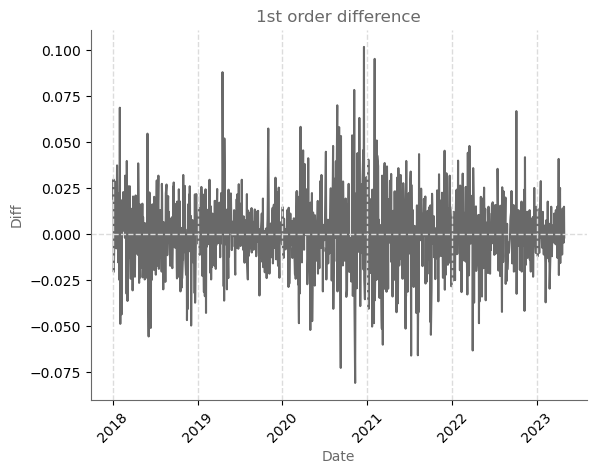

In [9]:
dt = st.diff(periods=1)
dt = dt[1:]

fig, axes = plt.subplots()
axes.plot(dt, label=col, color='dimgray');
axes.axhline(0, color='gainsboro', linestyle='--', linewidth=1)
for x in [datetime.datetime(y, 1, 1) for y in dt.index.year.unique()]:
    axes.axvline(x, color='gainsboro', linestyle='--', linewidth=1)

axes.set_xlabel('Date', color='dimgray');
axes.set_ylabel('Diff', color='dimgray');
axes.set_title('1st order difference', color='dimgray');
axes.spines[['top', 'right']].set_visible(False);
axes.spines[['left', 'bottom']].set_color('dimgray');
plt.xticks(rotation=45);

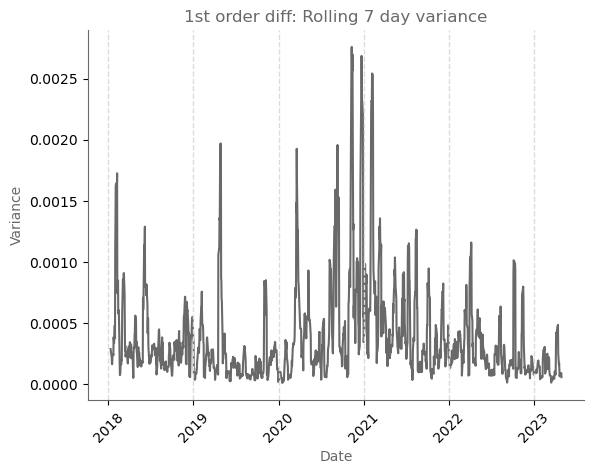

In [10]:
fig, axes = plt.subplots()
axes.plot(dt.rolling(7).var(), color='dimgray');
for x in [datetime.datetime(y, 1, 1) for y in dt.index.year.unique()]:
    axes.axvline(x, color='gainsboro', linestyle='--', linewidth=1)

axes.set_ylabel('Variance', color='dimgray');
axes.set_title('1st order diff: Rolling 7 day variance', color='dimgray');
axes.set_xlabel('Date', color='dimgray');
axes.spines[['top', 'right']].set_visible(False);
axes.spines[['left', 'bottom']].set_color('dimgray');
plt.xticks(rotation=45);

In [11]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# decomp_mul = seasonal_decompose(y['Close'], model='multiplicative', period=365)
# decomp_add = seasonal_decompose(y['Close'], model='additive', period=365)

# fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, constrained_layout=True, figsize=(6.4*2, 4.8))
# axes[0, 0].plot(decomp_mul.trend);
# axes[0, 1].plot(decomp_add.trend);
# axes[1, 0].plot(decomp_mul.seasonal);
# axes[1, 1].plot(decomp_add.seasonal);
# axes[2, 0].plot(decomp_mul.resid);
# axes[2, 1].plot(decomp_add.resid);
# axes[0, 0].set_title('Multiplicative decomposition', color='dimgray', size=10);
# axes[0, 1].set_title('Additive decomposition', color='dimgray', size=10);
# axes[0, 0].set_ylabel('Trend', color='dimgray');
# axes[1, 0].set_ylabel('Seasonal', color='dimgray');
# axes[2, 0].set_ylabel('Residual', color='dimgray');
# axes[2, 0].set_xlabel('Date', color='dimgray');
# axes[2, 1].set_xlabel('Date', color='dimgray');

# for ax in axes.flatten():
#     ax.spines[['top', 'right']].set_visible(False);
#     ax.spines[['left', 'bottom']].set_color('dimgray');

In [12]:
# # Remove volatility
# weekly_std = dt.groupby(dt.index.weekofyear).std()
# # st_weekly_std = st_diff.index.map(lambda x: weekly_std.loc[x.weekday])
# # st_diff_vol = st_diff/st_weekly_std

# # fig, axes = plt.subplots()
# # axes.plot(st_diff_vol.loc['2020-01-01':], label=col, color='dimgray');
# # axes.axhline(0, linestyle='--')

# # axes.set_ylabel('Difference', color='dimgray');
# # axes.set_title('1st order difference after removing volatility', color='dimgray');
# # axes.set_xlabel('Date', color='dimgray');
# # axes.spines[['top', 'right']].set_visible(False);
# # axes.spines[['left', 'bottom']].set_color('dimgray');

In [13]:
# # Difference to remove the seasonal effects
# daily_avgs = dt.groupby(dt.index.dayofyear).mean()
# dt_daily_avg = dt.index.map(lambda x: daily_avgs.loc[x.dayofyear])
# dt_seasonal = dt - dt_daily_avg

# fig, axes = plt.subplots()
# axes.plot(dt_seasonal, color='dimgray');
# axes.set_ylabel('Difference', color='dimgray');
# axes.set_title('1st order difference after removing seasonality', color='dimgray');
# axes.set_xlabel('Date', color='dimgray');
# axes.spines[['top', 'right']].set_visible(False);
# axes.spines[['left', 'bottom']].set_color('dimgray');
# plt.xticks(rotation=45);

## Stationarity test
* The Dickey-Fuller test confirms stationarity. 

In [14]:
from statsmodels.tsa.stattools import adfuller

adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(dt)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -11.561662303956256
ADF p-values: 3.2590595595837495e-21
ADF number of lags used: 8
ADF number of observations: 1330
ADF critical values: {'1%': -3.4352762901939395, '5%': -2.863715568491867, '10%': -2.567928279721861}
ADF best information criterion: -6670.417471511992


# Model selection

## Correlation
Autocorrelation and partial autocorrelation are used during model selection.

***Autocorrelation***
$$ r_k = \frac{\sum_{t=k+1}^T(y_t-\bar y)(y_{t-k}-\bar y)}{\sum_{t=1}^T(y_t-\bar y)^2}$$

Autocorrelation is the Pearson correlation between values as a function of the time lag *k*. It gives a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.

***Partial autocorrelation***

The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

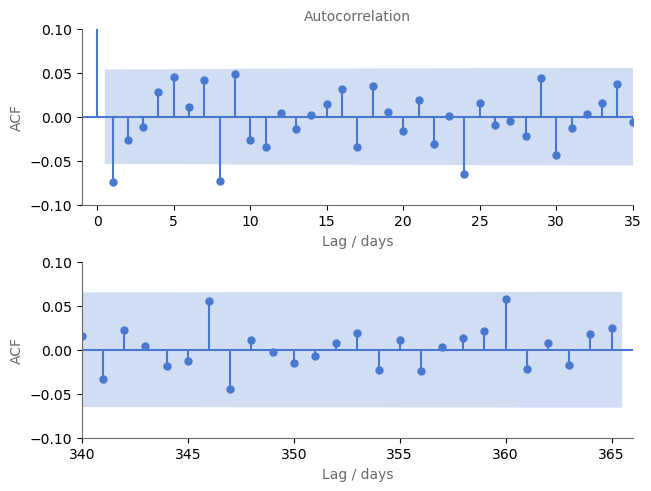

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

fig, axes = plt.subplots(nrows=2, ncols=1, constrained_layout=True)
plot_acf(dt, lags=365, ax=axes[0]);
plot_acf(dt, lags=365, ax=axes[1]);

for i, ax in enumerate(axes):
    if i == 0:
        ax.set_xlim([-1,35])
        ax.set_title('Autocorrelation', color='dimgray', size=10);
    else:
        ax.set_xlim([340, 366])
        ax.set_title('', color='dimgray', size=10);
    ax.set_ylim([-0.1, 0.1])
    ax.set_xlabel('Lag / days', color='dimgray');
    ax.set_ylabel('ACF', color='dimgray');
    ax.spines[['top', 'right']].set_visible(False);
    ax.spines[['left', 'bottom']].set_color('dimgray');

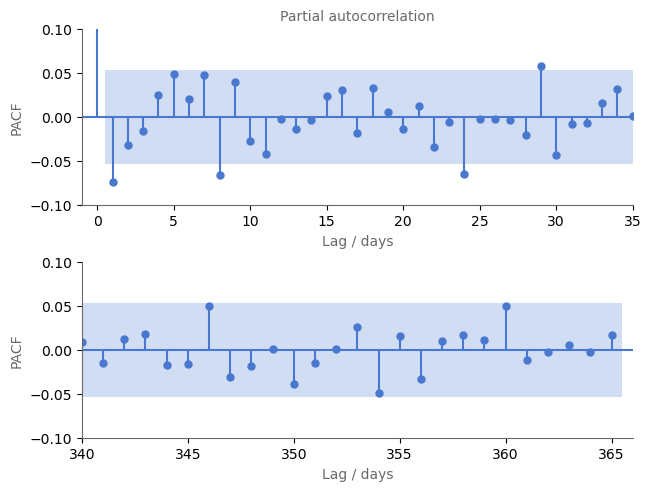

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf

fig, axes = plt.subplots(nrows=2, ncols=1, constrained_layout=True)
plot_pacf(dt, lags=365, ax=axes[0]);
plot_pacf(dt, lags=365, ax=axes[1]);

for i, ax in enumerate(axes):
    if i == 0:
        ax.set_xlim([-1,35])
        ax.set_title('Partial autocorrelation', color='dimgray', size=10);
    else:
        ax.set_xlim([340, 366])
        ax.set_title('', color='dimgray', size=10);
    ax.set_ylim([-0.1, 0.1])
    ax.set_xlabel('Lag / days', color='dimgray');
    ax.set_ylabel('PACF', color='dimgray');
    ax.spines[['top', 'right']].set_visible(False);
    ax.spines[['left', 'bottom']].set_color('dimgray');

## Train/test split

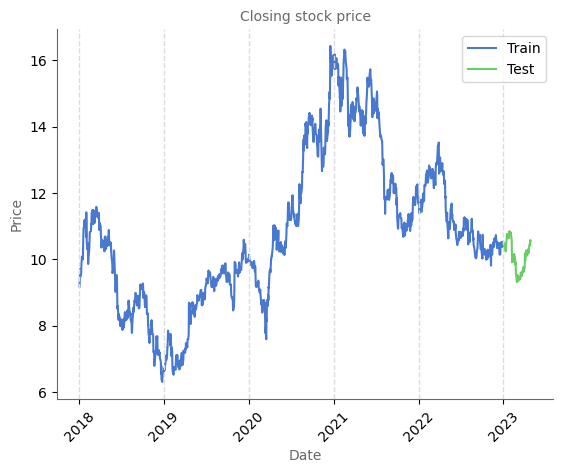

In [17]:
# Create train/test set
train = y['Close'].loc[:'2023-01-01'].copy(deep=True)
test = y['Close'].loc['2023-01-01':].copy(deep=True)

fig, axes = plt.subplots(nrows=1, ncols=1)
axes.plot(train, label='Train');
axes.plot(test, label='Test');
for x in [datetime.datetime(y, 1, 1) for y in dt.index.year.unique()]:
    axes.axvline(x, color='gainsboro', linestyle='--', linewidth=1)

axes.set_xlabel('Date', color='dimgray');
axes.set_ylabel('Price', color='dimgray');
axes.set_title('Closing stock price', color='dimgray', size=10);
axes.spines[['top', 'right']].set_visible(False);
axes.spines[['left', 'bottom']].set_color('dimgray');
axes.legend();
plt.xticks(rotation=45);

## Hyperparameter selection

In [18]:
from statsmodels.tsa.arima.model import ARIMA
p = 8 # regressive terms
d = 1
q = 0 # moving average terms
model_fit = ARIMA(train.values, order=(p, d, q)).fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1259
Model:                 ARIMA(8, 1, 0)   Log Likelihood                 173.562
Date:                Thu, 21 Sep 2023   AIC                           -329.125
Time:                        18:18:43   BIC                           -282.889
Sample:                             0   HQIC                          -311.749
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0782      0.024     -3.315      0.001      -0.124      -0.032
ar.L2         -0.0344      0.023     -1.516      0.130      -0.079       0.010
ar.L3         -0.0113      0.025     -0.451      0.6

## Cross validation
* CV is conducted using a rolling forecast origin

In [19]:
N = 150 # rolling forecasts
rolling_predictions = pd.concat([train[-N:], pd.Series()],
                                axis=1,
                                keys=['actual','prediction'])

for train_end in rolling_predictions.index:
    rolling_train = train[:train_end - datetime.timedelta(days=1)]
    model_fit = ARIMA(rolling_train.values, order=(p, d, q)).fit()
    rolling_predictions.loc[train_end,'prediction'] = model_fit.forecast(1)

rolling_predictions['residual'] = rolling_predictions['prediction'] - rolling_predictions['actual']
rolling_predictions.head(5)

,actual,prediction,residual
2022-05-27 00:00:00,11.218,11.373325278924034,0.155325
2022-05-31 00:00:00,11.120,11.232891176978972,0.112891
2022-06-01 00:00:00,11.142,11.111482753935148,-0.030517
2022-06-02 00:00:00,11.112,11.134741532846139,0.022742
2022-06-03 00:00:00,10.884,11.097522049728825,0.213522


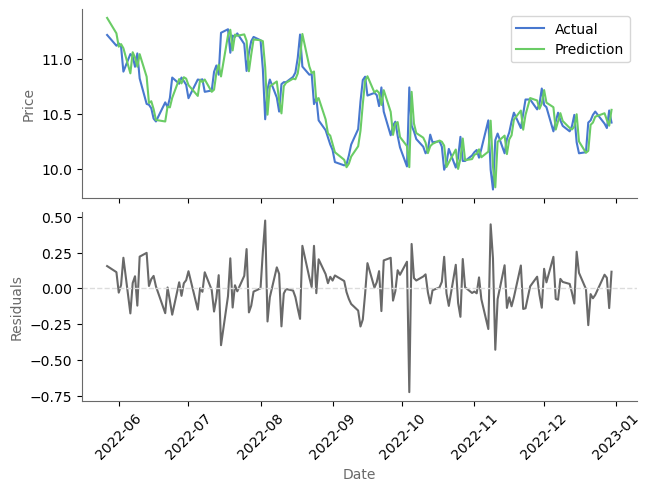

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=1, constrained_layout=True, sharex=True)
axes[0].plot(train[-N:], label='Actual');
axes[0].plot(rolling_predictions['prediction'], label='Prediction');
axes[1].plot(rolling_predictions['residual'], color='dimgray')
axes[1].axhline(0, color='gainsboro', linestyle='--', linewidth=1)

for i, ax in enumerate(axes):
    if i==0:
        ax.legend()
        ax.set_ylabel('Price', color='dimgray', size=10); 
    else:
        ax.set_ylabel('Residuals', color='dimgray', size=10);
        ax.set_xlabel('Date', color='dimgray');
    ax.spines[['top', 'right']].set_visible(False);
    ax.spines[['left', 'bottom']].set_color('dimgray');
plt.xticks(rotation=45);

In [21]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_predictions['residual']/rolling_predictions['actual'])),4))
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_predictions['residual']**2)))

Mean Absolute Percent Error: 0.0112
Root Mean Squared Error: 0.15879839669987977


## Model comparison
* AIC vs BIC

# Testing

In [22]:
rolling_test = pd.concat([test, pd.Series()],
                         axis=1,
                         keys=['actual','prediction']
                        )

for test_end in rolling_test.index:
    rolling_train = pd.concat([train, test[:test_end - datetime.timedelta(days=1)]])
    model_fit = ARIMA(rolling_train.values, order=(p, d, q)).fit()
    rolling_test.loc[test_end,'prediction'] = model_fit.forecast(1)

rolling_test['residual'] = rolling_test['prediction'] - rolling_test['actual']
rolling_test.head(5)

,actual,prediction,residual
2023-01-03 00:00:00,10.50,10.406490258644999,-0.09351
2023-01-04 00:00:00,10.37,10.490325306085822,0.120325
2023-01-05 00:00:00,10.30,10.377347155354103,0.077347
2023-01-06 00:00:00,10.42,10.306430780756632,-0.113569
2023-01-09 00:00:00,10.46,10.419576247289108,-0.040424


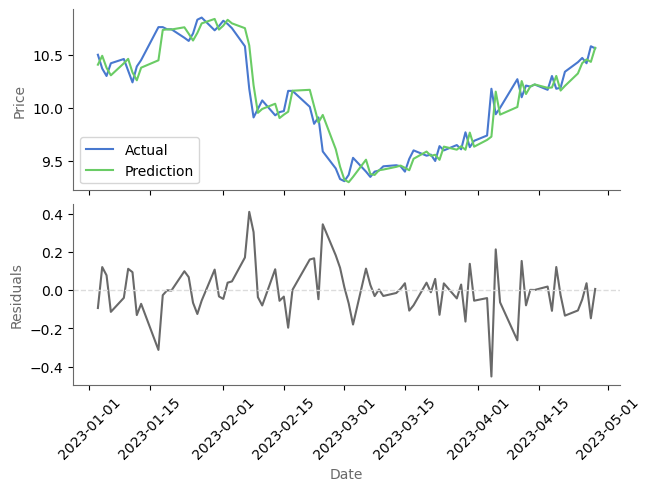

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=1, constrained_layout=True, sharex=True)
axes[0].plot(test, label='Actual');
axes[0].plot(rolling_test['prediction'], label='Prediction');
axes[1].plot(rolling_test['residual'], color='dimgray')
axes[1].axhline(0, color='gainsboro', linestyle='--', linewidth=1)

for i, ax in enumerate(axes):
    if i==0:
        ax.legend()
        ax.set_ylabel('Price', color='dimgray', size=10); 
    else:
        ax.set_ylabel('Residuals', color='dimgray', size=10);
        ax.set_xlabel('Date', color='dimgray');
    ax.spines[['top', 'right']].set_visible(False);
    ax.spines[['left', 'bottom']].set_color('dimgray');
plt.xticks(rotation=45);
plt.savefig('./figures/test_predictions.png')

In [24]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_test['residual']/rolling_test['actual'])),4))
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_test['residual']**2)))

Mean Absolute Percent Error: 0.0095
Root Mean Squared Error: 0.13107104752344542


# Conclusion